<a href="https://colab.research.google.com/github/MarkusDarkus/Data_Analytics/blob/main/Analytics_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.
Variables in the file:

order_id_new, order_try_id_new - id of an order

calc_created- time when the order was created

metered_price, distance, duration- actual price, distance and duration of a ride

upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

distance - ride distance

duration - ride duration

gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)

entered_by- who entered the address

b_state- state of a ride (finished implies that the ride was actually done)

dest_change_number- number of destination changes by a rider

predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

prediction_price_type- internal variable for the type of prediction:

upfront, prediction - prediction happened before the ride

upfront_destination_changed - prediction happened after rider changed destination during the ride

change_reason_pricing - records due to whose action the price changed

ticket_id_new - id for customer support ticket
# EDA

https://drive.google.com/file/d/1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd/view?usp=sharing

In [218]:
! gdown --id 1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZNLnbwS3hnhjy3_6CYBcSu_72PCEcnVd
To: /content/Analytical_Task_2 (taxi startup).csv
100% 792k/792k [00:00<00:00, 24.6MB/s]


In [219]:
import pandas as pd
import numpy as np
data=pd.read_csv("Analytical_Task_2 (taxi startup).csv")

In [220]:
data.head(1)

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0


In [221]:
data.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [222]:
data["overpaid_ride_ticket"].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

In [223]:
#time transpose
data["calc_created"]=pd.to_datetime(data["calc_created"],format='%Y-%m-%d %H:%M:%S')


<Axes: xlabel='calc_created', ylabel='metered_price'>

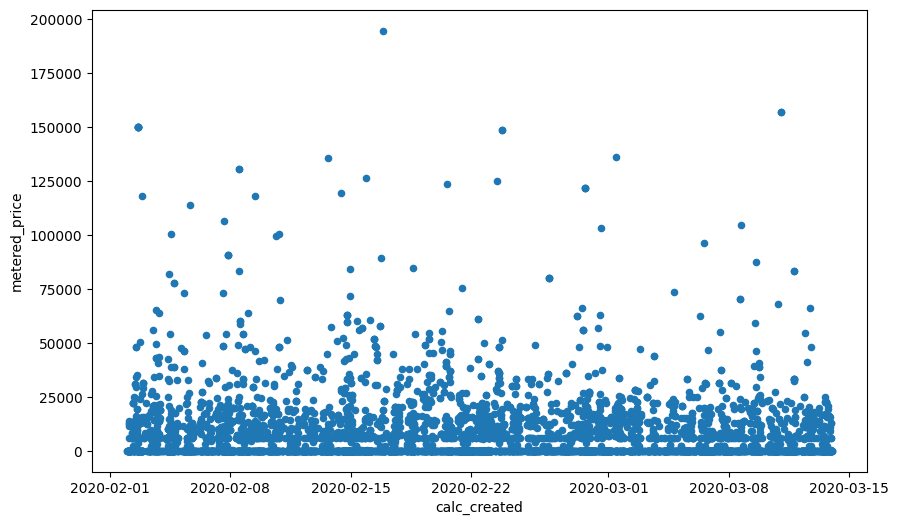

In [224]:
data.plot(x="calc_created",y="metered_price", kind="scatter",figsize=(10,6))

In [225]:
data["calc_created"].agg(["min", "max"])
#data for 1.5 month

min   2020-02-02 00:01:16
max   2020-03-13 23:52:07
Name: calc_created, dtype: datetime64[ns]

In [226]:
data.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
change_reason_pricing    0.939713
ticket_id_new            0.000000
device_token             1.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

# Let's go to Catboost))))

In [227]:
#!pip install catboost

In [228]:
from catboost import CatBoostClassifier

In [229]:
data["data_unix"]=data["calc_created"].astype(int)/10**9

In [230]:
data.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'data_unix'],
      dtype='object')

In [231]:
data.select_dtypes(include="object").isna().mean()

entered_by               0.000000
b_state                  0.000000
prediction_price_type    0.004046
change_reason_pricing    0.939713
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
device_name              0.000000
dtype: float64

In [232]:
data=data[(~data["prediction_price_type"].isna()) & (~data["rider_app_version"].isna())].copy()

In [233]:
train=data.sample(frac=0.7, random_state=42).copy()
val=data[~data.index.isin(train.index)].copy()

In [234]:
data.select_dtypes(include="object").columns

Index(['entered_by', 'b_state', 'prediction_price_type',
       'change_reason_pricing', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name'],
      dtype='object')

In [235]:
X_col=['order_id_new', 'order_try_id_new', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator',  'fraud_score',
       'data_unix']
y_col=['overpaid_ride_ticket']
cat_features=['entered_by', 'b_state', 'prediction_price_type', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name']

In [236]:
model =CatBoostClassifier(learning_rate=0.005,eval_metric="AUC",cat_features=cat_features,verbose=100)

In [237]:
model.fit(train[X_col], train[y_col],
          eval_set=(val[X_col], val[y_col]))

0:	test: 0.8134606	best: 0.8134606 (0)	total: 18.2ms	remaining: 18.2s
100:	test: 0.8488624	best: 0.8488912 (93)	total: 1.19s	remaining: 10.6s
200:	test: 0.8575905	best: 0.8575905 (200)	total: 1.74s	remaining: 6.93s
300:	test: 0.8634117	best: 0.8634261 (298)	total: 2.4s	remaining: 5.58s
400:	test: 0.8649407	best: 0.8654732 (378)	total: 3.12s	remaining: 4.66s
500:	test: 0.8648040	best: 0.8655811 (458)	total: 3.84s	remaining: 3.83s
600:	test: 0.8648616	best: 0.8655811 (458)	total: 4.58s	remaining: 3.04s
700:	test: 0.8644010	best: 0.8655811 (458)	total: 5.33s	remaining: 2.27s
800:	test: 0.8645593	best: 0.8655811 (458)	total: 6.08s	remaining: 1.51s
900:	test: 0.8644694	best: 0.8655811 (458)	total: 6.84s	remaining: 751ms
999:	test: 0.8648220	best: 0.8655811 (458)	total: 7.56s	remaining: 0us

bestTest = 0.8655811075
bestIteration = 458

Shrink model to first 459 iterations.


In [238]:
fi=pd.DataFrame({'feature':X_col, 'f1':model.feature_importances_})

In [239]:
fi.sort_values('f1', ascending=False)

,feature,f1
2,metered_price,13.985340
10,prediction_price_type,12.379858
21,eu_indicator,12.107867
22,fraud_score,8.901335
6,gps_confidence,7.448661
20,device_name,6.554602
5,duration,5.469510
3,upfront_price,5.262882
18,driver_app_version,4.596941
4,distance,4.086869


<Axes: xlabel='feature'>

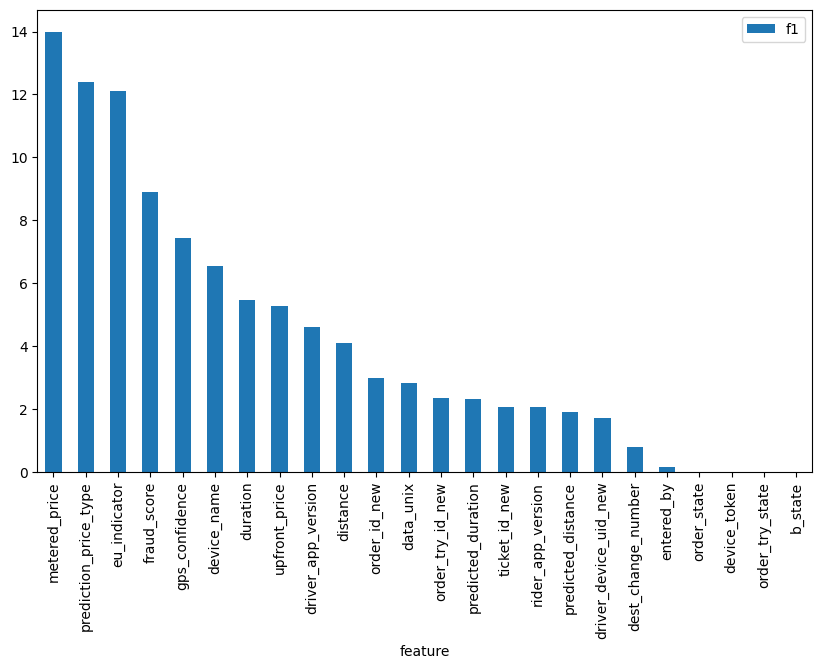

In [242]:
fi.sort_values('f1', ascending=False).set_index('feature').plot(kind='bar', figsize=(10,6))

<Axes: >

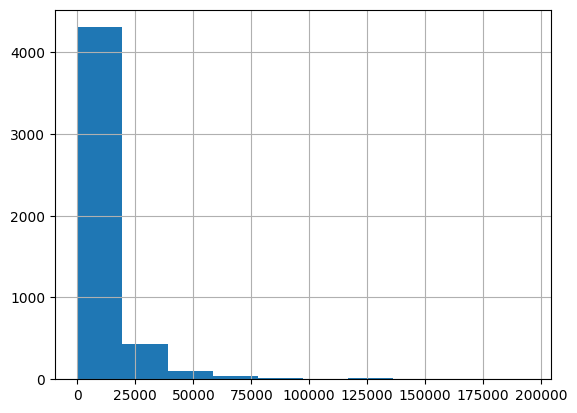

In [244]:
data["metered_price"].hist()